In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.6 MB/s eta 0:00:00


In [2]:
#reading the dataset
data = pd.read_csv('prosperLoanData.csv')

In [3]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The dataset consists of 113937 rows and 81 columns, where each row represents loans and each column is a feature

FEATURE SELECTION

Selected the features after multiple comparisons, RFE and manual analysis

In [5]:
features = ['ListingNumber','ListingCreationDate','ProsperRating (Alpha)','ProsperScore',
            'ListingCategory (numeric)', 'Occupation','EmploymentStatus', 
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', 
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus', 
            'CreditScoreRangeLower', 'CreditScoreRangeUpper','BorrowerState', 
            'LoanOriginationDate', 'IncomeRange','BorrowerAPR','BorrowerRate','StatedMonthlyIncome','Term']

In [6]:
#Creating a dataframe with these features
df = data[features]
df.head()

,ListingNumber,ListingCreationDate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,...,LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term
0,193129,2007-08-26 19:09:29.263000000,NaN,NaN,0,Other,Self-employed,True,5.0,1,...,Completed,640.0,659.0,CO,2007-09-12 00:00:00,"$25,000-49,999",0.16516,0.1580,3083.333333,36
1,1209647,2014-02-27 08:28:07.900000000,A,7.0,2,Professional,Employed,False,14.0,13,...,Current,680.0,699.0,CO,2014-03-03 00:00:00,"$50,000-74,999",0.12016,0.0920,6125.000000,36
2,81716,2007-01-05 15:00:47.090000000,NaN,NaN,0,Other,Not available,False,NaN,0,...,Completed,480.0,499.0,GA,2007-01-17 00:00:00,Not displayed,0.28269,0.2750,2083.333333,36
3,658116,2012-10-22 11:02:35.010000000,A,9.0,16,Skilled Labor,Employed,True,5.0,7,...,Current,800.0,819.0,GA,2012-11-01 00:00:00,"$25,000-49,999",0.12528,0.0974,2875.000000,36
4,909464,2013-09-14 18:38:39.097000000,D,4.0,2,Executive,Employed,True,19.0,6,...,Current,680.0,699.0,MN,2013-09-20 00:00:00,"$100,000+",0.24614,0.2085,9583.333333,36


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   ProsperRating (Alpha)      84853 non-null   object 
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   Occupation                 110349 non-null  object 
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   CurrentCreditLines         106333 non-null  float64
 9   OpenRevolvingAccounts      113937 non-null  int64  
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeVerifiable           113937 non-null  bool   
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanStatus                 11

EDA and Preprocessing

<Axes: xlabel='count', ylabel='LoanStatus'>

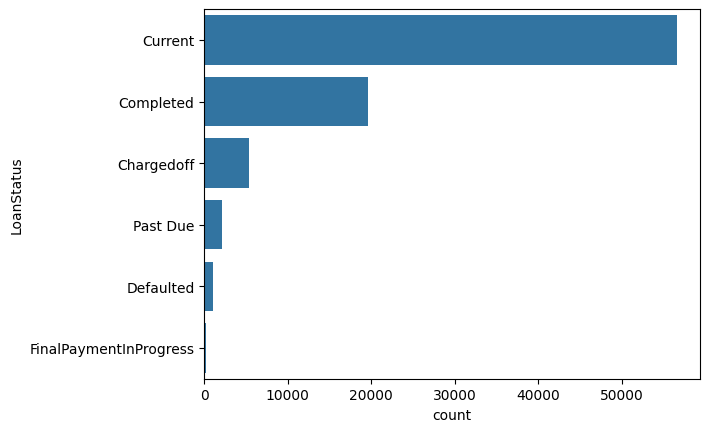

In [17]:
#Checking the counts of LoanStatus
color_base=sb.color_palette()[0]
status_order=df.LoanStatus.value_counts().index
sb.countplot(data=df, y='LoanStatus', order=status_order, color=color_base)

In [9]:
#ProsperRating is a really important feature, so removing all rows where it is null
df=df[df['ProsperRating (Alpha)'].notnull()]
#Filling null occupation values with 'Unknown'
df['Occupation']=df['Occupation'].fillna('Unknown')
#Converting ListingCreationDate to datetime format
df['ListingCreationDate']=pd.to_datetime(df['ListingCreationDate'])
#Extracting date month and year from ListingCreationDate
df['date'] = df['ListingCreationDate'].dt.date
df['year']= df['ListingCreationDate'].dt.year
df['month'] = df['ListingCreationDate'].dt.month
#Dropping ListingCreationDate and LoanOriginationDate as we have extracted required info
df.drop(['ListingCreationDate'], axis=1, inplace=True)
df.drop(['LoanOriginationDate'], axis=1, inplace=True)

In [10]:
#Converting ProsperScore to to int
df['ProsperScore']=df['ProsperScore'].astype(int)
#Taking credit score as an average of upper and lower limits
df['CreditScore_average'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2
#Dropping CreditScoreRangeLower and CreditScoreRangeUpper, no longer required
df.drop(['CreditScoreRangeLower'], axis=1, inplace=True)
df.drop(['CreditScoreRangeUpper'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84853 non-null  int64  
 1   ProsperRating (Alpha)      84853 non-null  object 
 2   ProsperScore               84853 non-null  int64  
 3   ListingCategory (numeric)  84853 non-null  int64  
 4   Occupation                 84853 non-null  object 
 5   EmploymentStatus           84853 non-null  object 
 6   IsBorrowerHomeowner        84853 non-null  bool   
 7   CurrentCreditLines         84853 non-null  float64
 8   OpenRevolvingAccounts      84853 non-null  int64  
 9   DebtToIncomeRatio          77557 non-null  float64
 10  IncomeVerifiable           84853 non-null  bool   
 11  LoanOriginalAmount         84853 non-null  int64  
 12  LoanStatus                 84853 non-null  object 
 13  BorrowerState              84853 non-null  ob

In [12]:
#Debt to income ratio has more null values, imputing missing values with mean
df['DebtToIncomeRatio']=df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].mean())

In [13]:
df['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [14]:
#Categorizing LoanStatus correctly
df['LoanStatus'] = df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')
status_dictionary = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']
loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = status_dictionary)
df['LoanStatus'] = df['LoanStatus'].astype(loan_status)

In [15]:
df['LoanStatus'].unique()

['Current', 'Past Due', 'Defaulted', 'Completed', 'Chargedoff', 'FinalPaymentInProgress']
Categories (6, object): ['Defaulted' < 'Chargedoff' < 'Past Due' < 'Current' <
                         'FinalPaymentInProgress' < 'Completed']

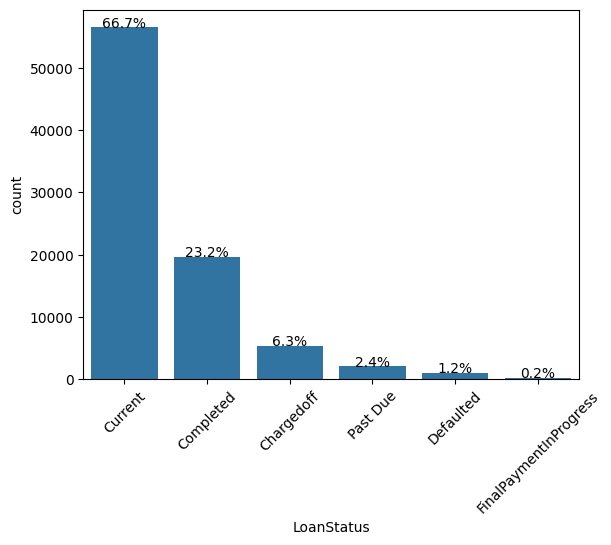

In [18]:
#Checking the percentage of LoanStatuses
n_loans=df['LoanStatus'].value_counts().sum()
status_count=df['LoanStatus'].value_counts()
status_order=status_count.index
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='LoanStatus', color=base_color, order=status_order);
locs, labels = plt.xticks(rotation=45) 
for loc, label in zip(locs, labels):
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

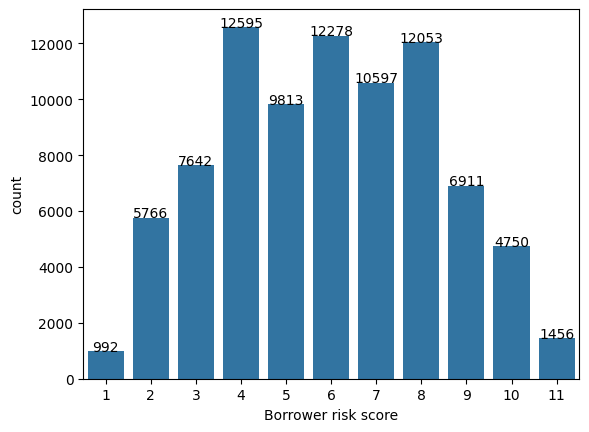

In [19]:
#Checking the count of Borrower risk scores
sb.countplot(data=df, x='ProsperScore', color=base_color);
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = df['ProsperScore'].value_counts()
for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

(0.0, 1.0)

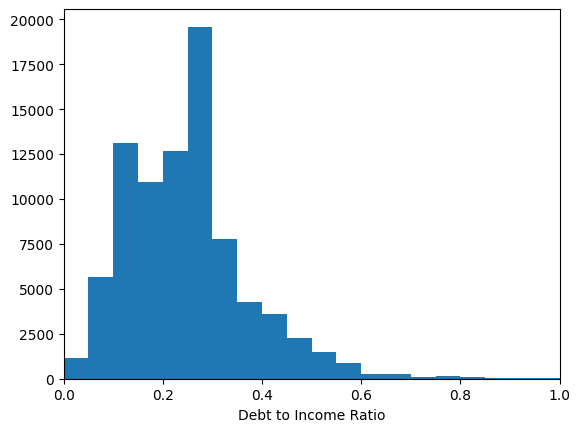

In [21]:
#Checking the counts of DebtToIncomeRatio
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1)

Text(0, 0.5, 'Employment Status')

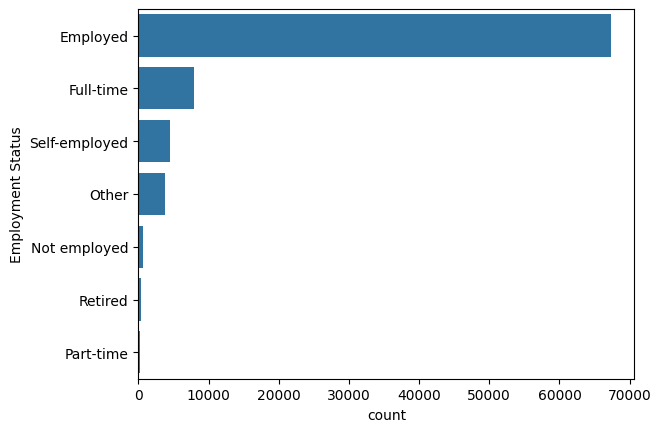

In [22]:
#Checking the employment status and respective counts
status_empl=df.EmploymentStatus.value_counts().index
sb.countplot(data=df, y='EmploymentStatus', order=status_empl, color=color_base)
plt.ylabel('Employment Status')

Text(0.5, 1.0, 'Distribution of Loan Original Amount ($)')

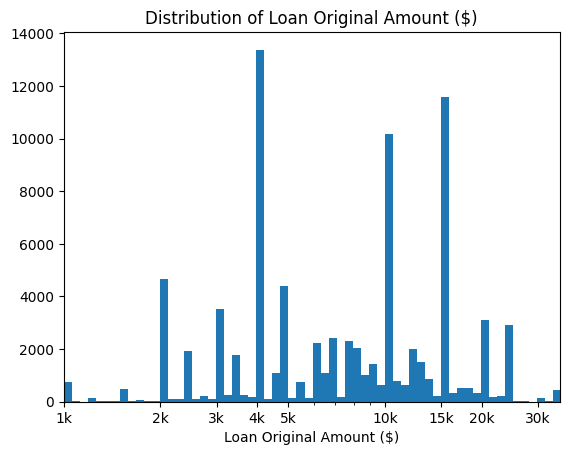

In [24]:
#Checking Loan Distribution ranges
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)')

Text(0.5, 0, 'Term in months')

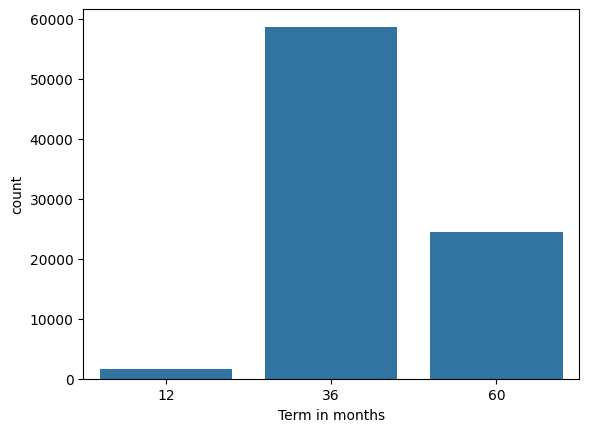

In [26]:
#Checking loan terms
sb.countplot(data=df, x='Term', color=color_base)
plt.xlabel('Term in months')

In [27]:
#Classifying income wages
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
df['WageGroup'] = df.apply(classify, axis=1)
ordinal_class = ['Low', 'Medium', 'High']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df['WageGroup'] = df['WageGroup'].astype(ordered_variable)

In [28]:
#Converting Loan Status into good/bad
status_good=['Current','Completed','FinalPaymentInProgress']
def cat_Loanstatus(row):
    for i in status_good:
        if i in row:
            return 1
    return 0
#Creating new variable loanstatus_cat for binary classification
df["loanstatus_cat"] = df.LoanStatus.apply(lambda x: cat_Loanstatus(x))
status = df.groupby('loanstatus_cat').agg({'CreditScore_average':'mean','BorrowerRate':'mean'})
status = status.reset_index()
status["loanstatus_cat"].replace({0: "Bad", 1: "Good"}, inplace=True)
status = status.sort_values(['CreditScore_average'],ascending=False).head(10)
status

,loanstatus_cat,CreditScore_average,BorrowerRate
1,Good,710.174472,0.189706
0,Bad,697.214082,0.253447


In [29]:
#Dropping a few columns which aren't of use anymore
df.drop('LoanStatus',axis=1,inplace=True)
df.drop('ProsperRating (Alpha)',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)

In [30]:
df.head()

,ListingNumber,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,...,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,year,month,CreditScore_average,WageGroup,loanstatus_cat
1,1209647,7,2,Professional,Employed,False,14.0,13,0.18,True,...,"$50,000-74,999",0.12016,0.0920,6125.000000,36,2014,2,689.5,Medium,1
3,658116,9,16,Skilled Labor,Employed,True,5.0,7,0.15,True,...,"$25,000-49,999",0.12528,0.0974,2875.000000,36,2012,10,809.5,Medium,1
4,909464,4,2,Executive,Employed,True,19.0,6,0.26,True,...,"$100,000+",0.24614,0.2085,9583.333333,36,2013,9,689.5,High,1
5,1074836,10,1,Professional,Employed,True,21.0,13,0.36,True,...,"$100,000+",0.15425,0.1314,8333.333333,60,2013,12,749.5,High,1
6,750899,2,1,Sales - Retail,Employed,False,10.0,6,0.27,True,...,"$25,000-49,999",0.31032,0.2712,2083.333333,36,2013,4,689.5,Low,1


Still a lot of catergorical variables, need to convert them to numbers using LabelEncoding

In [31]:
le = LabelEncoder()

In [32]:
#converting all these categorical variables into numerical variables
df['Occupation'] = le.fit_transform(df['Occupation'])
df['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])
df['IsBorrowerHomeowner'] = le.fit_transform(df['IsBorrowerHomeowner'])
df['IncomeVerifiable'] = le.fit_transform(df['IncomeVerifiable'])
df['ListingCategory (numeric)'] = le.fit_transform(df['ListingCategory (numeric)'])
df['WageGroup'] = le.fit_transform(df['WageGroup'])
df['BorrowerState'] = le.fit_transform(df['BorrowerState'])

In [33]:
#Dropping IncomeRange because we already have monthly income
df.drop('IncomeRange',axis=1,inplace=True)

In [34]:
df.head()

,ListingNumber,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,...,BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,year,month,CreditScore_average,WageGroup,loanstatus_cat
1,1209647,7,2,41,0,0,14.0,13,0.18,1,...,5,0.12016,0.0920,6125.000000,36,2014,2,689.5,2,1
3,658116,9,15,50,0,1,5.0,7,0.15,1,...,10,0.12528,0.0974,2875.000000,36,2012,10,809.5,2,1
4,909464,4,2,19,0,1,19.0,6,0.26,1,...,21,0.24614,0.2085,9583.333333,36,2013,9,689.5,0,1
5,1074836,10,1,41,0,1,21.0,13,0.36,1,...,29,0.15425,0.1314,8333.333333,60,2013,12,749.5,0,1
6,750899,2,1,48,0,0,10.0,6,0.27,1,...,15,0.31032,0.2712,2083.333333,36,2013,4,689.5,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84853 non-null  int64  
 1   ProsperScore               84853 non-null  int64  
 2   ListingCategory (numeric)  84853 non-null  int64  
 3   Occupation                 84853 non-null  int64  
 4   EmploymentStatus           84853 non-null  int64  
 5   IsBorrowerHomeowner        84853 non-null  int64  
 6   CurrentCreditLines         84853 non-null  float64
 7   OpenRevolvingAccounts      84853 non-null  int64  
 8   DebtToIncomeRatio          84853 non-null  float64
 9   IncomeVerifiable           84853 non-null  int64  
 10  LoanOriginalAmount         84853 non-null  int64  
 11  BorrowerState              84853 non-null  int64  
 12  BorrowerAPR                84853 non-null  float64
 13  BorrowerRate               84853 non-null  fl

Now we have just numerical variables, the dataset is clean and is ready for modelling

Let us try the popular models for Binary Classification

* Logistic Regression
* Decision Trees
* Random Forest
* SVM
* XGBoost
* CatBoost
* Neural Networks

In [36]:
#loanstatus_cat is our target variable
X = df.drop('loanstatus_cat', axis=1)
y = df['loanstatus_cat']

In [37]:
#Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1636
           1       0.90      1.00      0.95     15335

    accuracy                           0.90     16971
   macro avg       0.45      0.50      0.47     16971
weighted avg       0.82      0.90      0.86     16971



Really poor results, F1 Score and Recall for Class 0 is 0. Not viable

Decision Trees

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.21      0.24      0.22      1636
           1       0.92      0.90      0.91     15335

    accuracy                           0.84     16971
   macro avg       0.56      0.57      0.57     16971
weighted avg       0.85      0.84      0.84     16971



Low recall and f1 score for class 0

Random Forest

In [40]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.41      0.02      0.04      1636
           1       0.91      1.00      0.95     15335

    accuracy                           0.90     16971
   macro avg       0.66      0.51      0.50     16971
weighted avg       0.86      0.90      0.86     16971



Really low recall and f1 score for class 0

SVM

In [41]:
sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1636
           1       0.90      1.00      0.95     15335

    accuracy                           0.90     16971
   macro avg       0.45      0.50      0.47     16971
weighted avg       0.82      0.90      0.86     16971



0 recall and f1 score for class 0. Poor model

XGBoost

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.34      0.04      0.07      1636
           1       0.91      0.99      0.95     15335

    accuracy                           0.90     16971
   macro avg       0.63      0.52      0.51     16971
weighted avg       0.85      0.90      0.86     16971



low recall and f1 score for class 0

CatBoost

In [43]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print(classification_report(y_test, y_pred_cat))

Learning rate set to 0.062387
0:	learn: 0.6204322	total: 75.9ms	remaining: 1m 15s
1:	learn: 0.5587922	total: 106ms	remaining: 53s
2:	learn: 0.5085275	total: 128ms	remaining: 42.7s
3:	learn: 0.4658831	total: 151ms	remaining: 37.5s
4:	learn: 0.4357394	total: 172ms	remaining: 34.2s
5:	learn: 0.4128892	total: 199ms	remaining: 32.9s
6:	learn: 0.3886065	total: 222ms	remaining: 31.6s
7:	learn: 0.3730231	total: 258ms	remaining: 32s
8:	learn: 0.3591772	total: 283ms	remaining: 31.1s
9:	learn: 0.3479529	total: 302ms	remaining: 29.9s
10:	learn: 0.3347471	total: 324ms	remaining: 29.1s
11:	learn: 0.3238837	total: 348ms	remaining: 28.7s
12:	learn: 0.3171637	total: 368ms	remaining: 28s
13:	learn: 0.3108578	total: 403ms	remaining: 28.4s
14:	learn: 0.3022717	total: 425ms	remaining: 27.9s
15:	learn: 0.2961586	total: 443ms	remaining: 27.3s
16:	learn: 0.2912556	total: 465ms	remaining: 26.9s
17:	learn: 0.2873608	total: 491ms	remaining: 26.8s
18:	learn: 0.2838711	total: 514ms	remaining: 26.5s
19:	learn: 0.28

low recall and f1 score for class 0

Neural Networks

In [44]:
#Scaling the data for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Adding layers
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn = model.predict(X_test_scaled)
#Converting to binary because the output is in decimals
y_pred_bin = [1. * (y[0]>0.5) for y in y_pred_nn]
print(classification_report(y_test, y_pred_bin))

Epoch 1/10
2122/2122 [==============================] - 7s 3ms/step - loss: 0.2718 - accuracy: 0.9000 - val_loss: 0.2615 - val_accuracy: 0.9036
Epoch 2/10
2122/2122 [==============================] - 7s 3ms/step - loss: 0.2608 - accuracy: 0.9002 - val_loss: 0.2610 - val_accuracy: 0.9036
Epoch 3/10
2122/2122 [==============================] - 7s 3ms/step - loss: 0.2595 - accuracy: 0.9003 - val_loss: 0.2601 - val_accuracy: 0.9036
Epoch 4/10
2122/2122 [==============================] - 6s 3ms/step - loss: 0.2587 - accuracy: 0.9003 - val_loss: 0.2600 - val_accuracy: 0.9037
Epoch 5/10
2122/2122 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9003 - val_loss: 0.2610 - val_accuracy: 0.9035
Epoch 6/10
2122/2122 [==============================] - 6s 3ms/step - loss: 0.2576 - accuracy: 0.9003 - val_loss: 0.2600 - val_accuracy: 0.9035
Epoch 7/10
2122/2122 [==============================] - 5s 2ms/step - loss: 0.2572 - accuracy: 0.9002 - val_loss: 0.2599 - val_accuracy:

low recall and f1-score for class 0

In [45]:
y_train.value_counts()

1    61110
0     6772
Name: loanstatus_cat, dtype: int64

The dataset is highly imbalanced, as such these ML models performed really poorly in predicting class 0. Let us apply sampling techniques on the datasets like 

* Undersampling
* Oversampling
* SMOTE
* SMOTEENN

And perform modelling on this sampled data

Undersampling

In [46]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [47]:
y_train_rus.value_counts()

0    6772
1    6772
Name: loanstatus_cat, dtype: int64

We've managed to reduce the value of class 1 by undersampling

Logistic Regression

In [48]:
lr.fit(X_train_rus, y_train_rus)
y_pred_lr1 = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.19      0.79      0.31      1636
           1       0.97      0.64      0.77     15335

    accuracy                           0.66     16971
   macro avg       0.58      0.72      0.54     16971
weighted avg       0.89      0.66      0.73     16971



Way better recall and f1-score than the previous model

Decision Trees

In [49]:
dt.fit(X_train_rus, y_train_rus)
y_pred_dt1 = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.17      0.63      0.26      1636
           1       0.94      0.66      0.78     15335

    accuracy                           0.66     16971
   macro avg       0.55      0.65      0.52     16971
weighted avg       0.87      0.66      0.73     16971



Similar performance but slightly better, because Decision Trees take imbalance into consideration while modelling

Random Forest

In [50]:
clf.fit(X_train_rus, y_train_rus)
y_pred_clf1 = clf.predict(X_test)
print(classification_report(y_test, y_pred_clf1))

              precision    recall  f1-score   support

           0       0.21      0.80      0.33      1636
           1       0.97      0.68      0.80     15335

    accuracy                           0.69     16971
   macro avg       0.59      0.74      0.57     16971
weighted avg       0.90      0.69      0.76     16971



Much better recall and f1 score

SVM

In [51]:
sv = svm.SVC()
sv.fit(X_train_rus, y_train_rus)
y_pred_svm1 = sv.predict(X_test)
print(classification_report(y_test, y_pred_svm1))

              precision    recall  f1-score   support

           0       0.17      0.88      0.29      1636
           1       0.98      0.54      0.70     15335

    accuracy                           0.57     16971
   macro avg       0.57      0.71      0.49     16971
weighted avg       0.90      0.57      0.66     16971



Much better recall and f1 score compared to before where it was 0

XGBoost

In [52]:
xgb.fit(X_train_rus, y_train_rus)
y_pred_xgb1 = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.21      0.76      0.32      1636
           1       0.96      0.69      0.80     15335

    accuracy                           0.69     16971
   macro avg       0.58      0.72      0.56     16971
weighted avg       0.89      0.69      0.76     16971



Better but similar performance, because XGB also takes imbalance into consideration while modelling

CatBoost

In [53]:
cat.fit(X_train_rus, y_train_rus)
y_pred_cat1 = cat.predict(X_test)
print(classification_report(y_test, y_pred_cat1))

Learning rate set to 0.031347
0:	learn: 0.6810042	total: 8.35ms	remaining: 8.34s
1:	learn: 0.6687976	total: 15.2ms	remaining: 7.57s
2:	learn: 0.6576618	total: 22.3ms	remaining: 7.42s
3:	learn: 0.6483098	total: 29.5ms	remaining: 7.35s
4:	learn: 0.6391435	total: 36.3ms	remaining: 7.22s
5:	learn: 0.6313912	total: 43.6ms	remaining: 7.22s
6:	learn: 0.6234739	total: 50.5ms	remaining: 7.17s
7:	learn: 0.6167410	total: 58.4ms	remaining: 7.24s
8:	learn: 0.6108953	total: 65.6ms	remaining: 7.22s
9:	learn: 0.6050290	total: 72.8ms	remaining: 7.2s
10:	learn: 0.5974451	total: 79.9ms	remaining: 7.18s
11:	learn: 0.5922578	total: 87.1ms	remaining: 7.17s
12:	learn: 0.5863469	total: 94.2ms	remaining: 7.15s
13:	learn: 0.5819797	total: 101ms	remaining: 7.11s
14:	learn: 0.5770714	total: 108ms	remaining: 7.1s
15:	learn: 0.5732667	total: 115ms	remaining: 7.09s
16:	learn: 0.5696439	total: 123ms	remaining: 7.1s
17:	learn: 0.5656077	total: 130ms	remaining: 7.09s
18:	learn: 0.5618605	total: 137ms	remaining: 7.07s
1

Better but similar performance, because Catboost also takes imbalance into consideration while modelling

Neural Networks

In [54]:
#Scaling the data for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)
#Adding layers
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_rus, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn1 = model.predict(X_test_scaled)
#Converting to binary because the output is in decimals
y_pred_bin1 = [1. * (y[0]>0.5) for y in y_pred_nn1]
print(classification_report(y_test, y_pred_bin1))

Epoch 1/10
424/424 [==============================] - 3s 4ms/step - loss: 0.5478 - accuracy: 0.7236 - val_loss: 0.5306 - val_accuracy: 0.6909
Epoch 2/10
424/424 [==============================] - 2s 5ms/step - loss: 0.5086 - accuracy: 0.7510 - val_loss: 0.5005 - val_accuracy: 0.6985
Epoch 3/10
424/424 [==============================] - 2s 5ms/step - loss: 0.5033 - accuracy: 0.7549 - val_loss: 0.5327 - val_accuracy: 0.6822
Epoch 4/10
424/424 [==============================] - 2s 5ms/step - loss: 0.5014 - accuracy: 0.7544 - val_loss: 0.5030 - val_accuracy: 0.6965
Epoch 5/10
424/424 [==============================] - 3s 8ms/step - loss: 0.4994 - accuracy: 0.7566 - val_loss: 0.5477 - val_accuracy: 0.6853
Epoch 6/10
424/424 [==============================] - 2s 4ms/step - loss: 0.4982 - accuracy: 0.7572 - val_loss: 0.5136 - val_accuracy: 0.6982
Epoch 7/10
424/424 [==============================] - 2s 5ms/step - loss: 0.4967 - accuracy: 0.7586 - val_loss: 0.5138 - val_accuracy: 0.6974
Epoch 

Much better F1 and recall

The performance of the models drastically improved for class 0 after undersampling

Oversampling

In [55]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [56]:
y_train_ros.value_counts()

1    61110
0    61110
Name: loanstatus_cat, dtype: int64

Class 0 oversampled

Logistic Regression

In [57]:
lr.fit(X_train_ros, y_train_ros)
y_pred_lr2 = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.19      0.79      0.31      1636
           1       0.97      0.64      0.77     15335

    accuracy                           0.66     16971
   macro avg       0.58      0.72      0.54     16971
weighted avg       0.89      0.66      0.73     16971



Better recall and f1 score

Decision Trees

In [58]:
dt.fit(X_train_ros, y_train_ros)
y_pred_dt2 = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22      1636
           1       0.92      0.91      0.92     15335

    accuracy                           0.85     16971
   macro avg       0.57      0.57      0.57     16971
weighted avg       0.85      0.85      0.85     16971



Slightly lower F1 and recall

Random Forest

In [59]:
clf.fit(X_train_ros, y_train_ros)
y_pred_clf2 = clf.predict(X_test)
print(classification_report(y_test, y_pred_clf2))

              precision    recall  f1-score   support

           0       0.33      0.10      0.15      1636
           1       0.91      0.98      0.94     15335

    accuracy                           0.89     16971
   macro avg       0.62      0.54      0.55     16971
weighted avg       0.85      0.89      0.87     16971



Lower F1 and recall

SVM

In [60]:
sv = svm.SVC()
sv.fit(X_train_ros, y_train_ros)
y_pred_svm2 = sv.predict(X_test)
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.17      0.87      0.29      1636
           1       0.98      0.56      0.71     15335

    accuracy                           0.59     16971
   macro avg       0.57      0.71      0.50     16971
weighted avg       0.90      0.59      0.67     16971



Lower F1 and recall

XGBoost

In [61]:
xgb.fit(X_train_ros, y_train_ros)
y_pred_xgb2 = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.23      0.69      0.35      1636
           1       0.96      0.75      0.84     15335

    accuracy                           0.75     16971
   macro avg       0.59      0.72      0.59     16971
weighted avg       0.89      0.75      0.80     16971



Better performance

CatBoost

In [62]:
cat.fit(X_train_ros, y_train_ros)
y_pred_cat2 = cat.predict(X_test)
print(classification_report(y_test, y_pred_cat2))

Learning rate set to 0.080194
0:	learn: 0.6587358	total: 50.7ms	remaining: 50.7s
1:	learn: 0.6334119	total: 85.1ms	remaining: 42.5s
2:	learn: 0.6134339	total: 116ms	remaining: 38.7s
3:	learn: 0.5981711	total: 150ms	remaining: 37.3s
4:	learn: 0.5842882	total: 190ms	remaining: 37.9s
5:	learn: 0.5724294	total: 245ms	remaining: 40.5s
6:	learn: 0.5636103	total: 289ms	remaining: 41s
7:	learn: 0.5562082	total: 322ms	remaining: 39.9s
8:	learn: 0.5493479	total: 355ms	remaining: 39.1s
9:	learn: 0.5436245	total: 389ms	remaining: 38.6s
10:	learn: 0.5384312	total: 426ms	remaining: 38.3s
11:	learn: 0.5340002	total: 460ms	remaining: 37.9s
12:	learn: 0.5306201	total: 498ms	remaining: 37.8s
13:	learn: 0.5269475	total: 541ms	remaining: 38.1s
14:	learn: 0.5246514	total: 578ms	remaining: 37.9s
15:	learn: 0.5217101	total: 631ms	remaining: 38.8s
16:	learn: 0.5198194	total: 664ms	remaining: 38.4s
17:	learn: 0.5178053	total: 697ms	remaining: 38s
18:	learn: 0.5163182	total: 747ms	remaining: 38.6s
19:	learn: 0.

Better performance

Neural Networks

In [63]:
#Scaling the data for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)
#Adding layers
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_ros, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn2 = model.predict(X_test_scaled)
#Converting to binary because the output is in decimals
y_pred_bin2 = [1. * (y[0]>0.5) for y in y_pred_nn2]
print(classification_report(y_test, y_pred_bin2))

Epoch 1/10
3820/3820 [==============================] - 11s 3ms/step - loss: 0.5112 - accuracy: 0.7471 - val_loss: 0.5121 - val_accuracy: 0.7013
Epoch 2/10
3820/3820 [==============================] - 8s 2ms/step - loss: 0.4989 - accuracy: 0.7552 - val_loss: 0.5148 - val_accuracy: 0.7060
Epoch 3/10
3820/3820 [==============================] - 10s 3ms/step - loss: 0.4947 - accuracy: 0.7578 - val_loss: 0.5474 - val_accuracy: 0.6822
Epoch 4/10
3820/3820 [==============================] - 10s 3ms/step - loss: 0.4911 - accuracy: 0.7616 - val_loss: 0.5309 - val_accuracy: 0.6891
Epoch 5/10
3820/3820 [==============================] - 10s 3ms/step - loss: 0.4880 - accuracy: 0.7631 - val_loss: 0.4977 - val_accuracy: 0.7107
Epoch 6/10
3820/3820 [==============================] - 9s 2ms/step - loss: 0.4850 - accuracy: 0.7640 - val_loss: 0.5137 - val_accuracy: 0.6972
Epoch 7/10
3820/3820 [==============================] - 9s 2ms/step - loss: 0.4822 - accuracy: 0.7653 - val_loss: 0.5303 - val_accur

Some models performed better on oversampled data while some models performed better on undersampled data.

SMOTE

In [64]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Logistic Regression

In [65]:
lr.fit(X_train_smote, y_train_smote)
y_pred_lr3 = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr3))

              precision    recall  f1-score   support

           0       0.19      0.80      0.30      1636
           1       0.97      0.63      0.76     15335

    accuracy                           0.64     16971
   macro avg       0.58      0.71      0.53     16971
weighted avg       0.89      0.64      0.72     16971



Decision Trees

In [66]:
dt.fit(X_train_smote, y_train_smote)
y_pred_dt3 = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt3))

              precision    recall  f1-score   support

           0       0.20      0.32      0.24      1636
           1       0.92      0.86      0.89     15335

    accuracy                           0.81     16971
   macro avg       0.56      0.59      0.57     16971
weighted avg       0.85      0.81      0.83     16971



Better than oversampling

Random Forest

In [67]:
clf.fit(X_train_smote, y_train_smote)
y_pred_clf3 = clf.predict(X_test)
print(classification_report(y_test, y_pred_clf3))

              precision    recall  f1-score   support

           0       0.27      0.24      0.26      1636
           1       0.92      0.93      0.93     15335

    accuracy                           0.86     16971
   macro avg       0.60      0.59      0.59     16971
weighted avg       0.86      0.86      0.86     16971



Better than oversampling

SVM

In [68]:
sv = svm.SVC()
sv.fit(X_train_smote, y_train_smote)
y_pred_svm3 = sv.predict(X_test)
print(classification_report(y_test, y_pred_svm3))

              precision    recall  f1-score   support

           0       0.17      0.87      0.29      1636
           1       0.98      0.56      0.71     15335

    accuracy                           0.59     16971
   macro avg       0.57      0.71      0.50     16971
weighted avg       0.90      0.59      0.67     16971



Similar results as oversampling

XGBoost

In [69]:
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb3 = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb3))

              precision    recall  f1-score   support

           0       0.34      0.08      0.13      1636
           1       0.91      0.98      0.95     15335

    accuracy                           0.90     16971
   macro avg       0.63      0.53      0.54     16971
weighted avg       0.85      0.90      0.87     16971



Performance with oversampling was better for class 0

CatBoost

In [70]:
cat.fit(X_train_smote, y_train_smote)
y_pred_cat3 = cat.predict(X_test)
print(classification_report(y_test, y_pred_cat3))

Learning rate set to 0.080194
0:	learn: 0.6526837	total: 103ms	remaining: 1m 42s
1:	learn: 0.6161061	total: 186ms	remaining: 1m 32s
2:	learn: 0.5900984	total: 241ms	remaining: 1m 20s
3:	learn: 0.5662584	total: 301ms	remaining: 1m 15s
4:	learn: 0.5278424	total: 357ms	remaining: 1m 10s
5:	learn: 0.5125886	total: 404ms	remaining: 1m 6s
6:	learn: 0.5006993	total: 452ms	remaining: 1m 4s
7:	learn: 0.4892734	total: 524ms	remaining: 1m 4s
8:	learn: 0.4788285	total: 598ms	remaining: 1m 5s
9:	learn: 0.4719866	total: 685ms	remaining: 1m 7s
10:	learn: 0.4650738	total: 733ms	remaining: 1m 5s
11:	learn: 0.4474179	total: 768ms	remaining: 1m 3s
12:	learn: 0.4425589	total: 799ms	remaining: 1m
13:	learn: 0.4370566	total: 830ms	remaining: 58.4s
14:	learn: 0.4305794	total: 863ms	remaining: 56.7s
15:	learn: 0.4204060	total: 903ms	remaining: 55.5s
16:	learn: 0.3949649	total: 939ms	remaining: 54.3s
17:	learn: 0.3918471	total: 971ms	remaining: 53s
18:	learn: 0.3890046	total: 1s	remaining: 51.9s
19:	learn: 0.3

Performance with oversampling was better for class 0

Neural Networks

In [71]:
#Scaling the data for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
#Adding layers
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn3 = model.predict(X_test_scaled)
#Converting to binary because the output is in decimals
y_pred_bin3 = [1. * (y[0]>0.5) for y in y_pred_nn3]
print(classification_report(y_test, y_pred_bin3))

Epoch 1/10
3820/3820 [==============================] - 11s 3ms/step - loss: 0.4426 - accuracy: 0.7904 - val_loss: 0.4728 - val_accuracy: 0.7569
Epoch 2/10
3820/3820 [==============================] - 9s 2ms/step - loss: 0.4071 - accuracy: 0.8117 - val_loss: 0.4464 - val_accuracy: 0.7697
Epoch 3/10
3820/3820 [==============================] - 10s 3ms/step - loss: 0.3933 - accuracy: 0.8193 - val_loss: 0.4327 - val_accuracy: 0.7766
Epoch 4/10
3820/3820 [==============================] - 10s 3ms/step - loss: 0.3809 - accuracy: 0.8256 - val_loss: 0.4473 - val_accuracy: 0.7757
Epoch 5/10
3820/3820 [==============================] - 11s 3ms/step - loss: 0.3694 - accuracy: 0.8307 - val_loss: 0.4381 - val_accuracy: 0.7774
Epoch 6/10
3820/3820 [==============================] - 11s 3ms/step - loss: 0.3617 - accuracy: 0.8354 - val_loss: 0.4415 - val_accuracy: 0.7786
Epoch 7/10
3820/3820 [==============================] - 10s 3ms/step - loss: 0.3572 - accuracy: 0.8371 - val_loss: 0.4064 - val_acc

Better performance on class 0

SMOTEENN

In [72]:
#SMOTEENN
_, X_sample, _, y_sample = train_test_split(X, y, random_state=42)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_sample, y_sample)

In [73]:
y_resampled.value_counts()

0    14743
1    12214
Name: loanstatus_cat, dtype: int64

Not perfectly resampled like undersampling and oversampling, but good enough for modelling

Logistic Regression

In [74]:
lr.fit(X_resampled, y_resampled)
y_pred_lr4 = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr4))

              precision    recall  f1-score   support

           0       0.18      0.84      0.30      1636
           1       0.97      0.60      0.74     15335

    accuracy                           0.62     16971
   macro avg       0.58      0.72      0.52     16971
weighted avg       0.90      0.62      0.70     16971



Decision Trees

In [75]:
dt.fit(X_resampled, y_resampled)
y_pred_dt4 = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt4))

              precision    recall  f1-score   support

           0       0.43      0.90      0.58      1636
           1       0.99      0.87      0.93     15335

    accuracy                           0.87     16971
   macro avg       0.71      0.89      0.75     16971
weighted avg       0.93      0.87      0.89     16971



Random Forest

In [76]:
clf.fit(X_resampled, y_resampled)
y_pred_clf4 = clf.predict(X_test)
print(classification_report(y_test, y_pred_clf4))

              precision    recall  f1-score   support

           0       0.42      0.90      0.57      1636
           1       0.99      0.87      0.92     15335

    accuracy                           0.87     16971
   macro avg       0.70      0.89      0.75     16971
weighted avg       0.93      0.87      0.89     16971



SVM

In [77]:
sv = svm.SVC()
sv.fit(X_resampled, y_resampled)
y_pred_svm4 = sv.predict(X_test)
print(classification_report(y_test, y_pred_svm4))

              precision    recall  f1-score   support

           0       0.17      0.90      0.28      1636
           1       0.98      0.52      0.68     15335

    accuracy                           0.56     16971
   macro avg       0.57      0.71      0.48     16971
weighted avg       0.90      0.56      0.64     16971



XGBoost

In [78]:
xgb.fit(X_resampled, y_resampled)
y_pred_xgb4 = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb4))

              precision    recall  f1-score   support

           0       0.48      0.77      0.59      1636
           1       0.97      0.91      0.94     15335

    accuracy                           0.90     16971
   macro avg       0.73      0.84      0.77     16971
weighted avg       0.93      0.90      0.91     16971



CatBoost

In [79]:
cat.fit(X_resampled, y_resampled)
y_pred_cat4 = cat.predict(X_test)
print(classification_report(y_test, y_pred_cat4))

Learning rate set to 0.042056
0:	learn: 0.6551340	total: 13.9ms	remaining: 13.9s
1:	learn: 0.6209875	total: 24.8ms	remaining: 12.4s
2:	learn: 0.5958515	total: 36.1ms	remaining: 12s
3:	learn: 0.5713168	total: 49.5ms	remaining: 12.3s
4:	learn: 0.5480206	total: 60.6ms	remaining: 12.1s
5:	learn: 0.5258523	total: 71.8ms	remaining: 11.9s
6:	learn: 0.5069088	total: 83.2ms	remaining: 11.8s
7:	learn: 0.4900938	total: 94.1ms	remaining: 11.7s
8:	learn: 0.4746944	total: 105ms	remaining: 11.6s
9:	learn: 0.4609455	total: 121ms	remaining: 12s
10:	learn: 0.4497157	total: 132ms	remaining: 11.9s
11:	learn: 0.4390557	total: 146ms	remaining: 12s
12:	learn: 0.4299309	total: 157ms	remaining: 11.9s
13:	learn: 0.4208240	total: 168ms	remaining: 11.8s
14:	learn: 0.4126434	total: 179ms	remaining: 11.8s
15:	learn: 0.4040302	total: 190ms	remaining: 11.7s
16:	learn: 0.3985629	total: 204ms	remaining: 11.8s
17:	learn: 0.3924709	total: 215ms	remaining: 11.7s
18:	learn: 0.3871540	total: 226ms	remaining: 11.7s
19:	learn

Neural Networks

In [80]:
#Scaling the data for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
#Adding layers
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_resampled, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
y_pred_nn4 = model.predict(X_test_scaled)
#Converting to binary because the output is in decimals
y_pred_bin4 = [1. * (y[0]>0.5) for y in y_pred_nn4]
print(classification_report(y_test, y_pred_bin4))

Epoch 1/10
843/843 [==============================] - 5s 4ms/step - loss: 0.3673 - accuracy: 0.8404 - val_loss: 0.6228 - val_accuracy: 0.6904
Epoch 2/10
843/843 [==============================] - 3s 4ms/step - loss: 0.3143 - accuracy: 0.8686 - val_loss: 0.6211 - val_accuracy: 0.6911
Epoch 3/10
843/843 [==============================] - 3s 4ms/step - loss: 0.3028 - accuracy: 0.8751 - val_loss: 0.5854 - val_accuracy: 0.7147
Epoch 4/10
843/843 [==============================] - 2s 3ms/step - loss: 0.2950 - accuracy: 0.8778 - val_loss: 0.5677 - val_accuracy: 0.7190
Epoch 5/10
843/843 [==============================] - 3s 4ms/step - loss: 0.2883 - accuracy: 0.8801 - val_loss: 0.6241 - val_accuracy: 0.6928
Epoch 6/10
843/843 [==============================] - 3s 4ms/step - loss: 0.2823 - accuracy: 0.8830 - val_loss: 0.6031 - val_accuracy: 0.7081
Epoch 7/10
843/843 [==============================] - 3s 4ms/step - loss: 0.2782 - accuracy: 0.8857 - val_loss: 0.6197 - val_accuracy: 0.7014
Epoch 

Please note, for the below confusion matrices

Model 1 - Model on unsampled data
Model 2 - Model on underampled data
Model 3 - Model on oversampled data
Model 4 - Model on SMOTE data
Model 5 - Model on SMOTEEN data 

In [81]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score, roc_auc_score

In [82]:
y_preds_lr = [y_pred_lr,y_pred_lr1, y_pred_lr2, y_pred_lr3, y_pred_lr4]
y_preds_dt = [y_pred_dt,y_pred_dt1, y_pred_dt2, y_pred_dt3, y_pred_dt4]
y_preds_clf = [y_pred_clf,y_pred_clf1, y_pred_clf2, y_pred_clf3, y_pred_clf4]
y_preds_svm = [y_pred_svm,y_pred_svm1, y_pred_svm2, y_pred_svm3, y_pred_svm4]
y_preds_xgb = [y_pred_xgb,y_pred_xgb1, y_pred_xgb2, y_pred_xgb3, y_pred_xgb4]
y_preds_cat = [y_pred_cat,y_pred_cat1, y_pred_cat2, y_pred_cat3, y_pred_cat4]
y_preds_nn = [y_pred_bin,y_pred_bin1,y_pred_bin2,y_pred_bin3,y_pred_bin4]

Logistic Regression Confusion Matrices and ROC-AUC

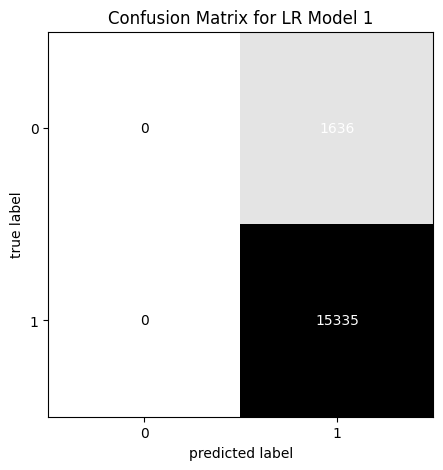

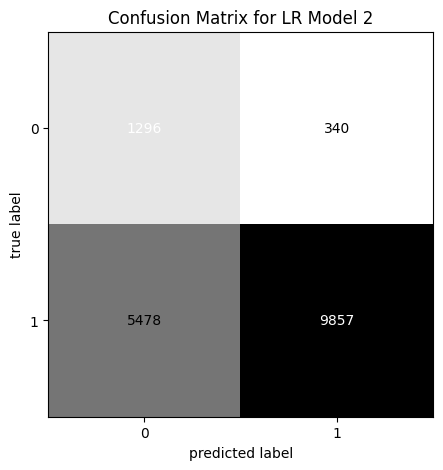

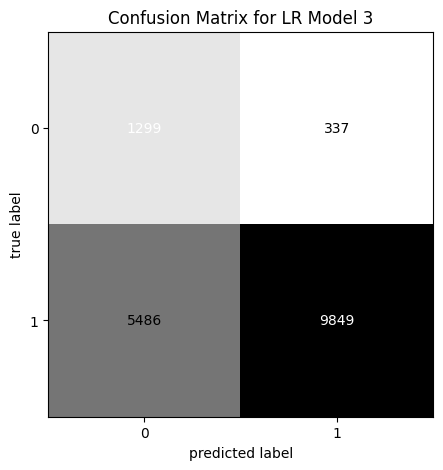

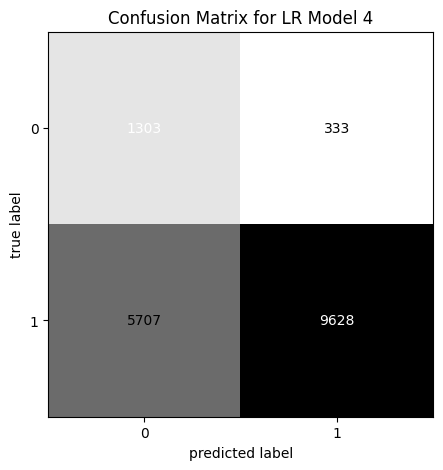

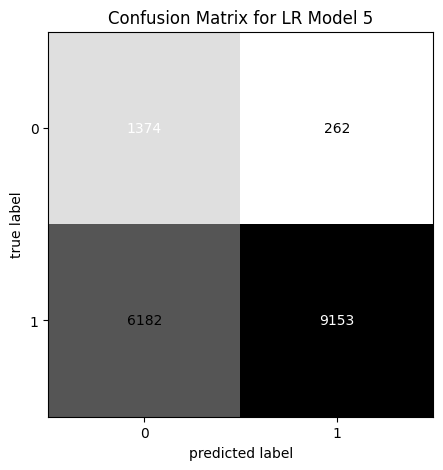

In [83]:
for i, y_pred in enumerate(y_preds_lr,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for LR Model {i}')
    plt.show()

In [84]:
for i, y_pred in enumerate(y_preds_lr, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.5
AUC-ROC for Model 2: 0.7174769990186567
AUC-ROC for Model 3: 0.7181330282213929
AUC-ROC for Model 4: 0.7121497836022395
AUC-ROC for Model 5: 0.7183616030892783


Decision Trees Confusion Matrices and AUC-ROC score

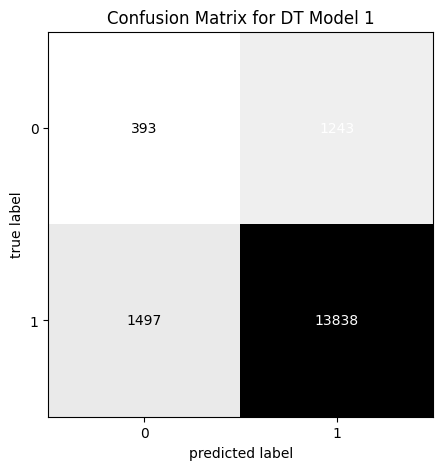

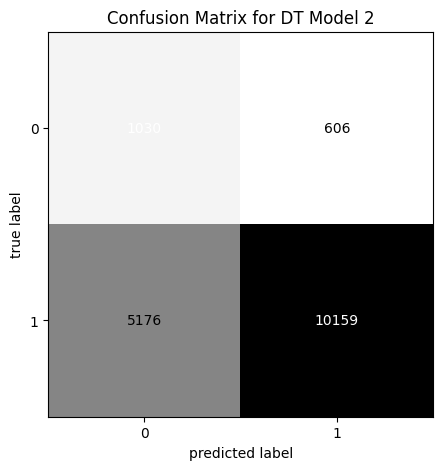

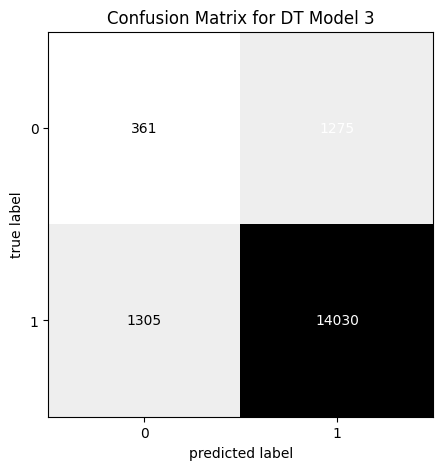

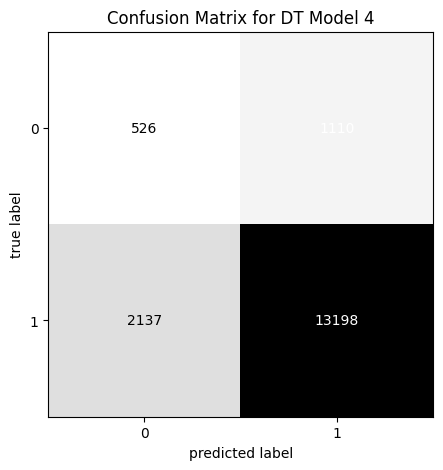

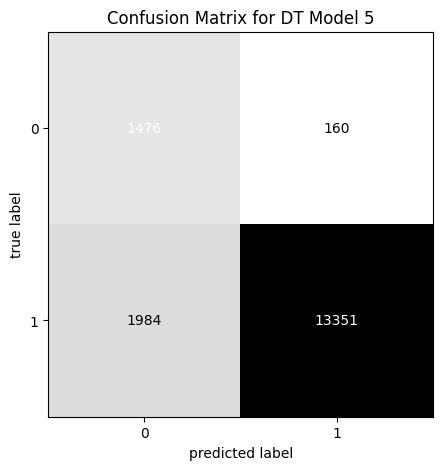

In [85]:
for i, y_pred in enumerate(y_preds_dt,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for DT Model {i}')
    plt.show()

In [86]:
for i, y_pred in enumerate(y_preds_dt, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.5713001124837871
AUC-ROC for Model 2: 0.6460279112852887
AUC-ROC for Model 3: 0.567780350493422
AUC-ROC for Model 4: 0.5910807372112471
AUC-ROC for Model 5: 0.8864116236966908


Random Forest Confusion Matrices and AUC-ROC

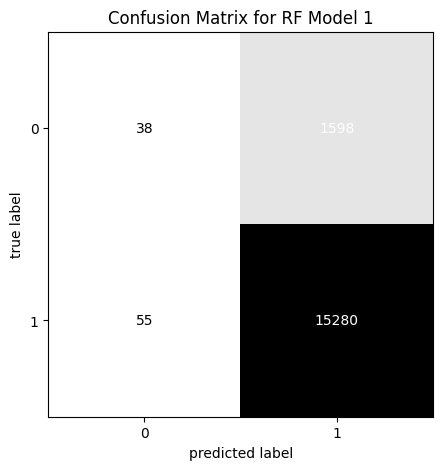

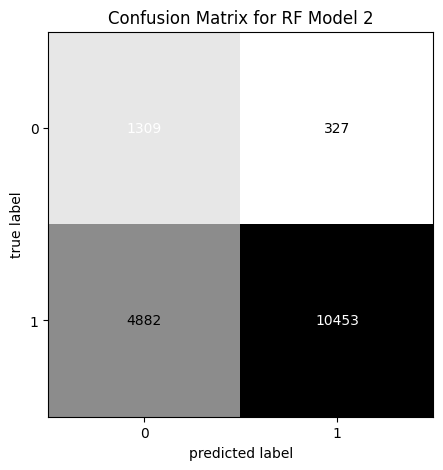

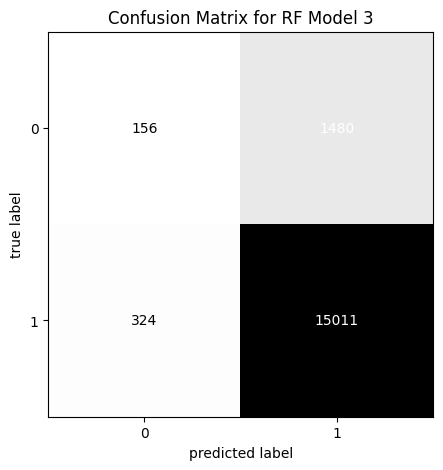

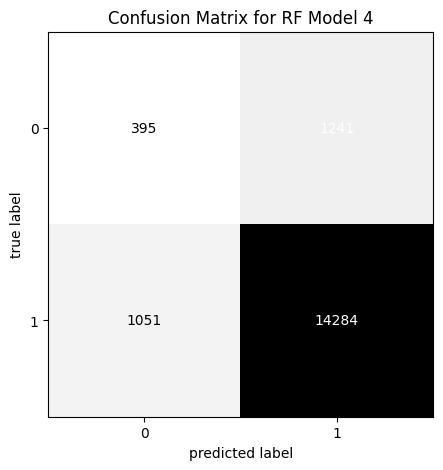

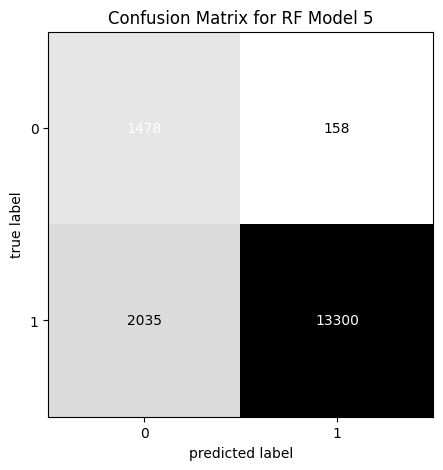

In [87]:
for i, y_pred in enumerate(y_preds_clf,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for RF Model {i}')
    plt.show()

In [88]:
for i, y_pred in enumerate(y_preds_clf, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.5098204085927728
AUC-ROC for Model 2: 0.7408827745150481
AUC-ROC for Model 3: 0.5371131924907706
AUC-ROC for Model 4: 0.5864532570473763
AUC-ROC for Model 5: 0.8853600079081444


SVM Confusion Matrices and AUC-ROC

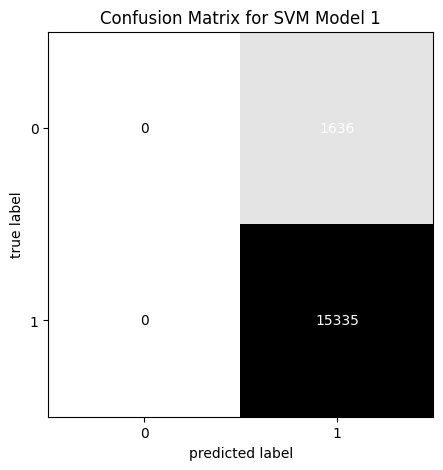

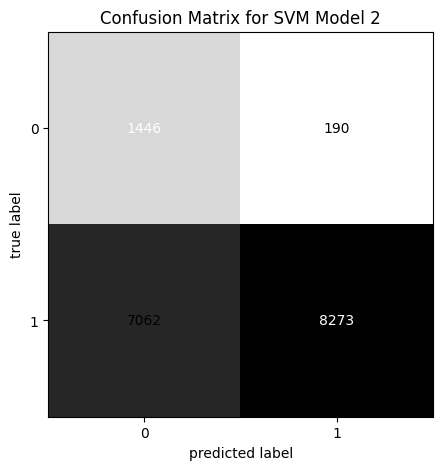

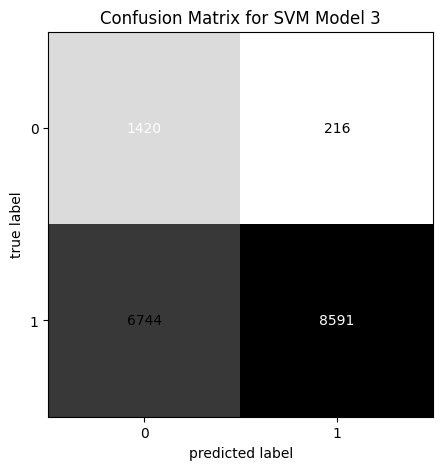

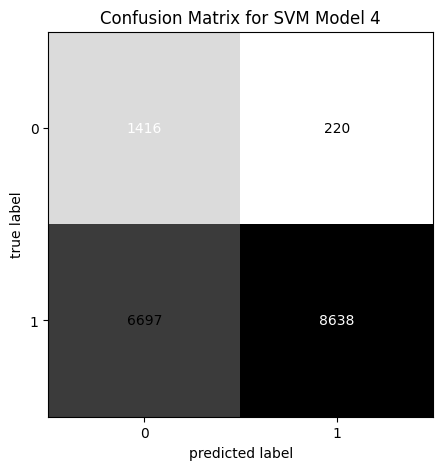

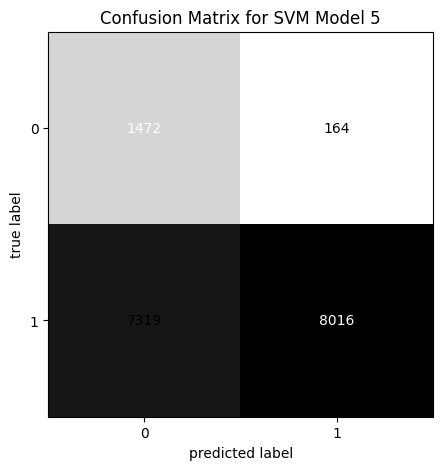

In [89]:
for i, y_pred in enumerate(y_preds_svm,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for SVM Model {i}')
    plt.show()

In [90]:
for i, y_pred in enumerate(y_preds_svm, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.5
AUC-ROC for Model 2: 0.711673959644548
AUC-ROC for Model 3: 0.714096187588837
AUC-ROC for Model 4: 0.7144061358271625
AUC-ROC for Model 5: 0.7112406459487103


XGBoost Confusion Matrices and AUC-ROC

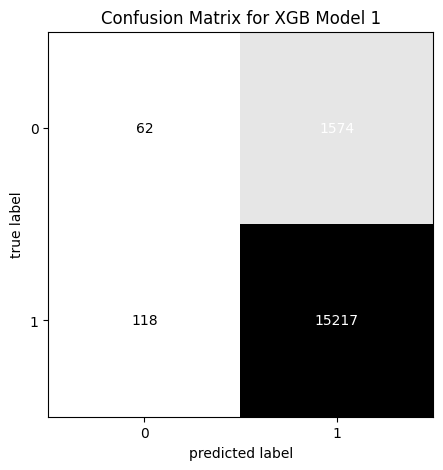

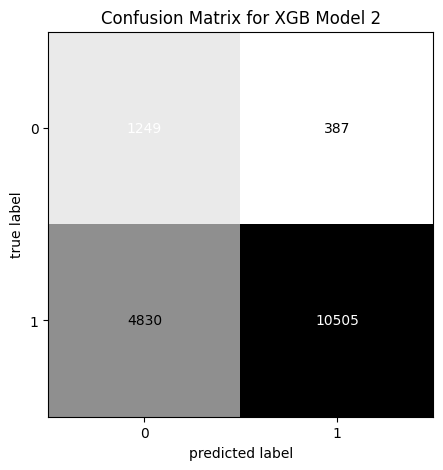

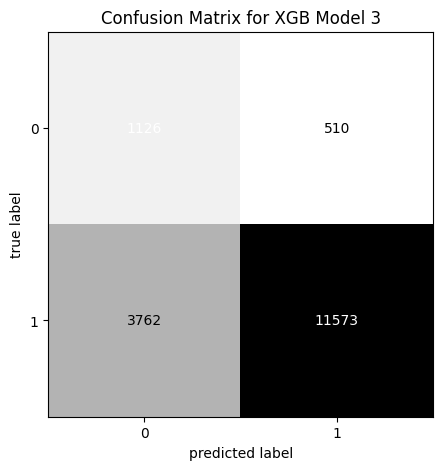

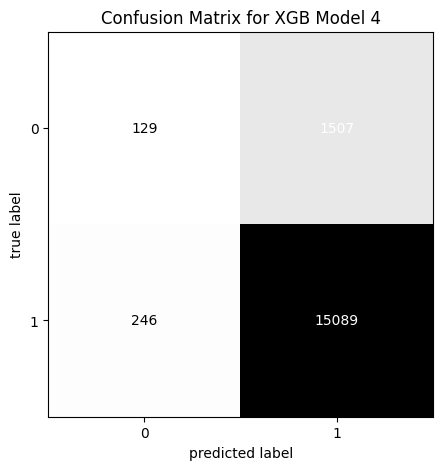

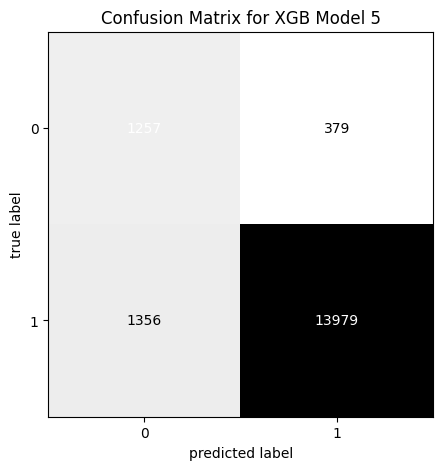

In [91]:
for i, y_pred in enumerate(y_preds_xgb,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for XGB Model {i}')
    plt.show()

In [92]:
for i, y_pred in enumerate(y_preds_xgb, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.515101247366277
AUC-ROC for Model 2: 0.7242408340860155
AUC-ROC for Model 3: 0.7214714489681546
AUC-ROC for Model 4: 0.5314045605758277
AUC-ROC for Model 5: 0.8399561185679563


CatBoost

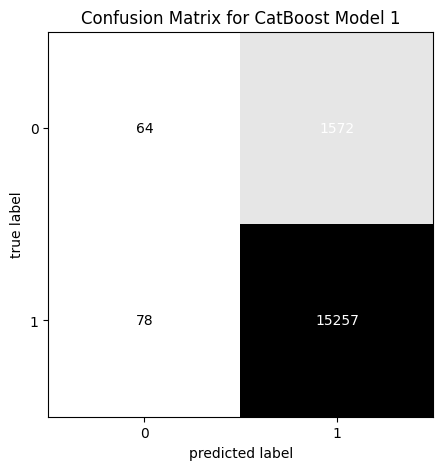

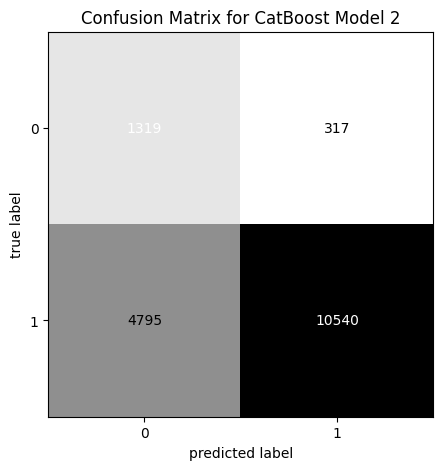

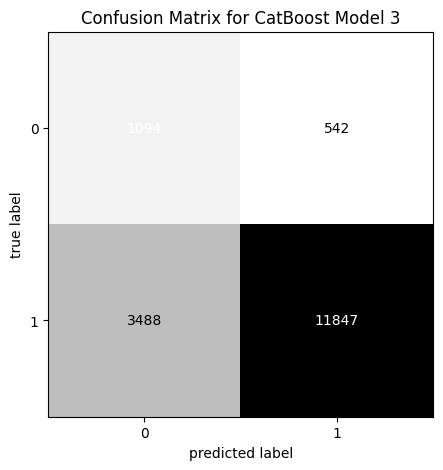

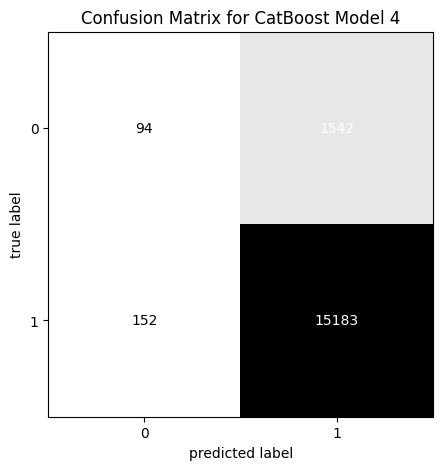

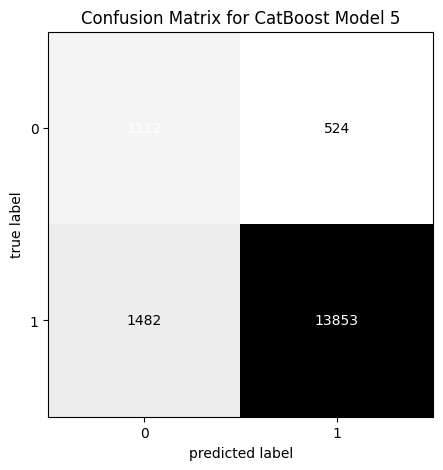

In [93]:
for i, y_pred in enumerate(y_preds_cat,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for CatBoost Model {i}')
    plt.show()

In [94]:
for i, y_pred in enumerate(y_preds_cat, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.5170167003746005
AUC-ROC for Model 2: 0.7467756574242888
AUC-ROC for Model 3: 0.7206253094101337
AUC-ROC for Model 4: 0.523772623311647
AUC-ROC for Model 5: 0.7915324660416151


Neural Network confusion matrices and AUC-ROC

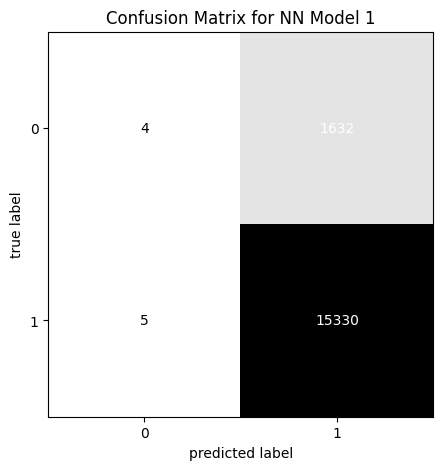

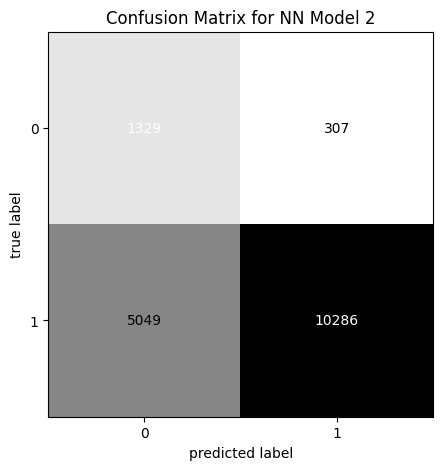

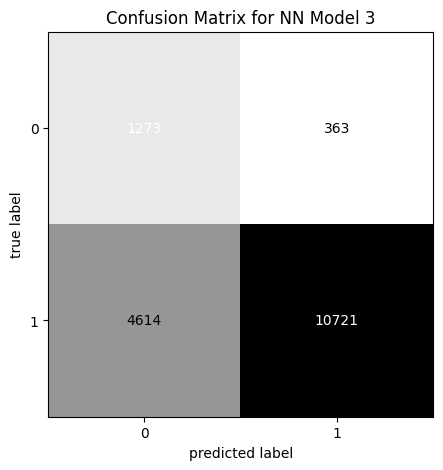

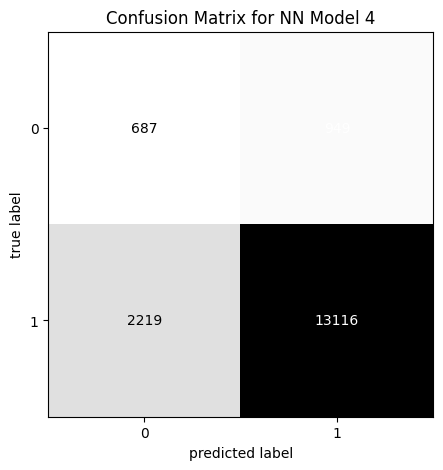

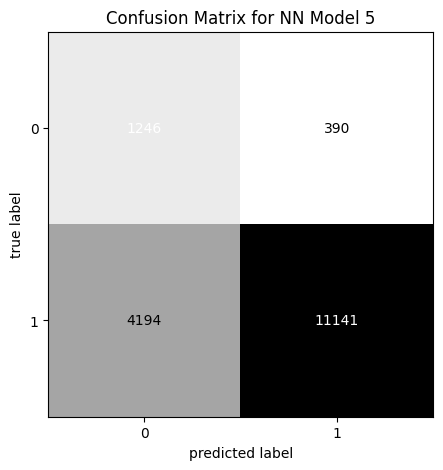

In [95]:
for i, y_pred in enumerate(y_preds_nn,start = 1):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,5), cmap=plt.cm.gist_yarg)
    ax.set_title(f'Confusion Matrix for NN Model {i}')
    plt.show()

In [96]:
for i, y_pred in enumerate(y_preds_nn, start=1):
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f'AUC-ROC for Model {i}: {auc_roc}')

AUC-ROC for Model 1: 0.5010594681294608
AUC-ROC for Model 2: 0.7415501836331705
AUC-ROC for Model 3: 0.7386185101598131
AUC-ROC for Model 4: 0.6376124937520079
AUC-ROC for Model 5: 0.7440608400968429


Thank You!